# MCT4000 Scientific Computing Session 12
![mct-banner](https://raw.githubusercontent.com/wiki/MCT-master/Guides/assets/img/mct-banner.jpg)

## 1. Working with MIDI Files

So far we have been working extensively with audio (i.e. signals, files and arrays in different formats such as number of channels, sampling rates, etc.). Audio is the most relevant information when it comes to music, as it encompass/capture most of its aspects. However symbolic representations of music are also important. The musical score (staff with notes) is likely the most common. When working with computers (or with digital musical devices) [MIDI](https://en.wikipedia.org/wiki/MIDI) format and files are very common (actually it's an industry standard!).

The MIDI protocol has been designed with machines in mind, not humans. Indeed it has been introduce to facilitate (and standardize) the "communication" across different machines (computers, sequencers, synthesizers, drum machines, and anythin in the between...). Indeed it is not easy for a human to read/interpret the raw data from a MIDI file (as opposite, you can listen the raw signal of an audio file and that WILL makes sense to your ears).
Indeed it is common for MIDI files or data to be visualized on a digital musical score or on a piano roll. For example, this helps to combine and visualize the pair of messages Note-On and Note-Off associated with each individual note.

The Python package [Pretty MIDI](https://pypi.org/project/pretty_midi/) provide utilities to handle MIDI data, including extracting information from MIDI files. This notebook demonstrates some key functionalities of this package. For more information an examples refer to the [documentation](http://craffel.github.io/pretty-midi/) and [tutorials](https://github.com/craffel/pretty-midi/blob/main/Tutorial.ipynb).

In [1]:
import pretty_midi
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
#loading midi and displaying info

pm = pretty_midi.PrettyMIDI('./Files/kpop_HTX0172.mid')
#pm = pretty_midi.PrettyMIDI('./Files/chp_op18.mid')

# pm is now an Object which includes all info extracted from the MIDI  files

# printing list of instruments (aka vices or tracks)
print(pm.instruments)

print('')

# iterating on the list of instruments snd checking if the track is the "drum" one
for instrument in pm.instruments:
    if instrument.is_drum:
        print('drum',instrument)
    else:
        print('other',instrument)

print('')
        
# printing some other key information
print('There are {} time signature changes'.format(len(pm.time_signature_changes)))
print('There are {} instruments'.format(len(pm.instruments)))
print('Instrument 0 has {} notes'.format(len(pm.instruments[0].notes)))
print('Instrument 0 has {} pitch bends'.format(len(pm.instruments[0].pitch_bends)))
print('Instrument 0 has {} control changes'.format(len(pm.instruments[0].control_changes)))


[Instrument(program=65, is_drum=False, name="gangam style"), Instrument(program=0, is_drum=True, name="gangam style"), Instrument(program=30, is_drum=False, name="gangam style"), Instrument(program=81, is_drum=False, name="gangam style"), Instrument(program=39, is_drum=False, name="gangam style"), Instrument(program=81, is_drum=False, name="gangam style"), Instrument(program=63, is_drum=False, name="gangam style"), Instrument(program=53, is_drum=False, name="gangam style"), Instrument(program=50, is_drum=False, name="gangam style")]

other Instrument(program=65, is_drum=False, name="gangam style")
drum Instrument(program=0, is_drum=True, name="gangam style")
other Instrument(program=30, is_drum=False, name="gangam style")
other Instrument(program=81, is_drum=False, name="gangam style")
other Instrument(program=39, is_drum=False, name="gangam style")
other Instrument(program=81, is_drum=False, name="gangam style")
other Instrument(program=63, is_drum=False, name="gangam style")
other In

In [3]:
# resynthesizing the MIDI file
# all voices/tracks will ve synthesized with the same "instrument"
# if this fails, install missing packages (stated in the error message)

fs = 16000
IPython.display.Audio(pm.synthesize(fs=16000), rate=16000)


NameError: name 'IPython' is not defined

In [ ]:
#getting and displaying piano roll (we can do this also on individual instruments)

piano_roll = pm.get_piano_roll()
print(type(piano_roll))
print(piano_roll.shape)
print(piano_roll)


# the pianoroll is a simple 2D array (or Matrix) of nummbers
# we can "recycle" any of the spectrogram display functions
# to cleveryly and easily display the pianoroll

# option 1 (this has better labels on vertical axis, if you zoom in)
plt.figure(figsize=(14, 4))
librosa.display.specshow(piano_roll, y_axis='cqt_note', cmap=plt.cm.hot, sr=1) #  the sampling rate is not relevant, setting to 1 to avoid a warning
plt.show()

# option 2
plt.figure(figsize=(14, 4))
plt.pcolormesh(piano_roll, vmin=0, vmax=127)
plt.ylabel('MIDI Note')
plt.xlabel('Time ')
plt.show()


In [ ]:
# getting and displaying histogram on the whole score
# can also be done on individual tracks/voices
# using pm.instruments[idx]get_pitch_class_histogram()
# where idx is an integer identifying the instrument/voice

hist = pm.get_pitch_class_histogram()
plt.bar(np.arange(12), hist);
plt.xticks(np.arange(12), ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'])
plt.xlabel('Note')
plt.ylabel('Proportion')


In [ ]:
# getting and displaying the chroma vectors on the whole score
# as above, can be done also on individual tracks/voices

chroma = pm.get_chroma()
print(chroma.shape)
print(chroma)

# as above, can be displayed using same techniques used for the spectrogram

# option 1 (this has better labels on vertical axis)
plt.figure(figsize=(14, 4))
librosa.display.specshow(chroma, y_axis='cqt_note', cmap=plt.cm.hot, sr=1)
plt.show()

# option 2
plt.figure(figsize=(14, 4))
plt.pcolormesh(chroma)
plt.ylabel('MIDI Note')
plt.xlabel('Time ')
plt.show()

In [ ]:
# printing and displaying pitch class transition matrix on the whole score
# as above, can be done also on individual tracks/voices

tx_matrix = pm.get_pitch_class_transition_matrix()
print(tx_matrix)
print(tx_matrix.shape)

# plotting using a plain and simple imshow
plt.imshow(tx_matrix)
plt.xticks(np.arange(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.yticks(np.arange(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.show()

Pretty MIDI also includes a collection of [utilities](https://craffel.github.io/pretty-midi/) such as those converting note number to name, note number to Hz, and note number to drum name, etc.

In [4]:
# library function to converty program to instrument name (according to General MIDI  standard)
print(pretty_midi.program_to_instrument_name(pm.instruments[0].program))

# the program is just a number within 0 to 127
print(pretty_midi.program_to_instrument_name(81))

Alto Sax
Lead 2 (sawtooth)


Depending on what we are planning to do with a MIDI file, understanding how to the "time domain" is handled can be essential.

Whwn creating the Pretty Midi object from a file, we can specify a resolution and the initial tempo (by default 220 and 120). Initial tempo as there may be "tempo change" messages in the MIDI file. The resolution (default 220) represents the number of ticks per unit of tempo.

The "time" in MIDI is represented by "ticks" (the smallest unit of tempo). Pretty Midi stores/convert the time in seconds, which can be more convenient.

(From Pretty MIDI tutorial) The amount of time each tick corresponds to depends on the current tempo and the file's resolution. Naturally, this is a woefully difficult way to deal with timing, which is why pretty_midi represents time in terms of absolute seconds. Hoever, we don't want to totally get rid of the metrical grid, so pretty_midi retains a mapping between times and ticks which is based on tempo change events.

In [5]:
pm = pretty_midi.PrettyMIDI('./Files/kpop_HTX0172.mid',resolution=220, initial_tempo=120.0)

# total duration in seconds
print('Total duration in seconds is {}'.format(pm.get_end_time()))

# tempo changes are 2 arrays in a tuple, time of the change and the new tempo
print('There are {} tempo changes'.format(len(pm.get_tempo_changes()[0])))

# What's the start time of the 10th note on the 3rd instrument?
print(pm.instruments[2].notes[10].start)

# What's that in ticks?
tick = pm.time_to_tick(pm.instruments[2].notes[10].start)
print(tick)

# Note we can also go in the opposite direction
print(pm.tick_to_time(int(tick)))



Total duration in seconds is 33.75083896666667
There are 1 tempo changes
12.452611666666668
13150
12.452611666666668


#### Task 1

Open your own midi files with Pretty Midi, and get a list of all tracks/voices included in it.

Then work with the file that present the more tracks/vlices (i.e. logest list of instruments). For each individual instrument, display the piano roll, pitch class histogram, chroma, and pitch class transition matrix.


## 2. Segmenting or Slicing Audio Files and Audio Signals

So far we have been working extensively with audio files and signals (stored in Numpy arrays). In most occasions we have loaded and worked with the entire duration of audio file. At times it may be convenient (or required) to load only segment, or to slice out a segment from an audio file already loaded in a Numpy array. In this section we explore different techniques to slice out segmenrs of audio, as well as possible strategies to select slicing point based on musical information.

This can be useful for your final assignment. However, this does not include slicing/segmenting the audio based on information extracted from an MIDI file associated to a wave file.

In [6]:
import numpy as np
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
import matplotlib.pyplot as plt


In [7]:
#loading full signal
signal_full, sr = librosa.load('./files/disco-funky-beat.wav', sr=48000, mono=True)
ipd.Audio(signal_full, rate=sr)

In [8]:
#slicing out 0.3 s starting from 2.5 seconds

#option 1 - using librosa, we can specify offset (starting point) and duration (length) both are float numbers in seconds
slice1, sr = librosa.load('./files/disco-funky-beat.wav', sr=48000, mono=True, duration=0.3, offset=2.5)

#option 2 - compute start and ending index of the 
start_idx = round(2.5 * sr)
end_idx = start_idx + round(0.3 * sr)
#for stereo it will be a bit more tricky as you need to handle both dimensions of the signal array
slice2 = signal_full[start_idx : end_idx]


#option 2 may look more complex but is computationally convenient when you have to load many segments from the same file
# because you load the audio file (includign eventual resampling and merge to mono) once for all and keep it in memory 
# instead of acessing the file multiple times (disk access is much slower than memory access)

ipd.display(ipd.Audio(slice1, rate=sr))
ipd.display(ipd.Audio(slice2, rate=sr))


In [9]:
#example 1 - slicing an audio signal in segments of fixed and arbitrary dutarion and arranging them on rows of a 2D Numpy array
sr=48000

signal_full, sr = librosa.load('./Files/disco-funky-beat.wav', sr=48000, mono=True)   

sliceLength = round(0.3*sr) #this is already in samples (more convenient)
offset = round(0*sr) #this is already in samples (more convenient)

signal_slices = np.empty((0,sliceLength)) #size of the row in samples
slice_points = [] #keeping track of the slicing points (can be useful)


while True:
    try:
        signal_slices = np.append(signal_slices, [signal_full[offset : offset+sliceLength]], axis = 0)
        slice_points = np.append(slice_points, offset)
        offset = offset + sliceLength
    except:
        print("done")
        break

print(signal_slices.shape)
print(slice_points)


done
(27, 14400)
[     0.  14400.  28800.  43200.  57600.  72000.  86400. 100800. 115200.
 129600. 144000. 158400. 172800. 187200. 201600. 216000. 230400. 244800.
 259200. 273600. 288000. 302400. 316800. 331200. 345600. 360000. 374400.]


In [10]:
#example 2 - slicing an audio signal in segments of fixed and dutarion related to the tempo and arranging them on rows of a 2D Numpy array
sr=48000

signal_full, sr = librosa.load('./Files/disco-funky-beat.wav', sr=48000, mono=True)   

#estimating time in BPM (skip ths if you already know the tempo)
onset_env = librosa.onset.onset_strength(signal_full, sr=sr)
tempo_BPM = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

print('tempo in BPM is',tempo_BPM)

#computing the duration of one beat (quarter of a bar in 4/4)
sliceLength = int(((60 * sr) / tempo_BPM) / 2)
offset = round(0*sr) 

signal_slices = np.empty((0,sliceLength)) #size of the row in samples
slice_points = [] #keeping track of the slicing points (can be useful)

while True:
    try:
        signal_slices = np.append(signal_slices, [signal_full[offset : offset+sliceLength]], axis = 0)
        slice_points = np.append(slice_points, offset)
        offset = offset + sliceLength
    except:
        print("done")
        break

print(signal_slices.shape)
print(slice_points)


/var/folders/by/m4c7_99d74j70dpnkg3np2r80000gq/T/ipykernel_48049/1356584575.py:7: FutureWarning: Pass y=[ 0.00016303  0.00088898  0.00074586 ... -0.00278796 -0.00068646
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(signal_full, sr=sr)


tempo in BPM is [114.79591837]
done
(32, 12544)
[     0.  12544.  25088.  37632.  50176.  62720.  75264.  87808. 100352.
 112896. 125440. 137984. 150528. 163072. 175616. 188160. 200704. 213248.
 225792. 238336. 250880. 263424. 275968. 288512. 301056. 313600. 326144.
 338688. 351232. 363776. 376320. 388864.]


In [11]:
#example 3 - slicing an audio signal in segments of different and dutarion between two consecutive onsets (zero padding to fit them into the same numpy 2D array)
sr=48000

signal_full, sr = librosa.load('./Files/disco-funky-beat.wav', sr=48000, mono=True)   

#finding sample position of onsets 
onsets = librosa.onset.onset_detect(y=signal_full, sr=sr, units='samples')
#the first onset if is at the very beginning of the file will be always skipped, therefore I am prepending a zero in the array, and adding the last sample fo the file as well (so that I can get also the first and last slice)
onsets = np.insert(onsets, 0, 0)
onsets = np.insert(onsets, onsets.shape[0], signal_full.shape[0])

#finding longest segment
maxLength = 0
for i in range(onsets.shape[0] - 1):
    temp = onsets[i+1] - onsets[i]
    if maxLength < temp:
        maxLength = temp

print('onsets are',onsets)


signal_slices = np.empty((0,maxLength)) #we need to estimate the size of a row in samples
slice_points = [] #keeping track of the slicing points (can be useful)

for i in range(onsets.shape[0] - 1):
    temp_slice = signal_full[onsets[i] : onsets[i+1]]
    if(temp_slice.size < maxLength):
        temp_slice = np.pad(temp_slice,(0,maxLength - temp_slice.size))
    signal_slices = np.append(signal_slices, [temp_slice], axis = 0)
    slice_points = np.append(slice_points, onsets[i])


print(signal_slices.shape)
print(slice_points)


onsets are [     0   1536  12288  25600  38400  45568  50688  58368  62976  75776
  81920  87552  89088  94720 100352 108032 113152 125440 133120 138240
 145920 150016 157696 162816 164864 170496 175616 183296 188416 195584
 200704 214016 227328 233472 239104 246784 252416 260608 264704 271872
 277504 284672 289280 296960 302592 310784 314368 321024 328192 338944
 341504 346624 348672 353280 360448 364544 371200 377856 384000 389632
 391168 397312 402568]
(62, 13312)
[     0.   1536.  12288.  25600.  38400.  45568.  50688.  58368.  62976.
  75776.  81920.  87552.  89088.  94720. 100352. 108032. 113152. 125440.
 133120. 138240. 145920. 150016. 157696. 162816. 164864. 170496. 175616.
 183296. 188416. 195584. 200704. 214016. 227328. 233472. 239104. 246784.
 252416. 260608. 264704. 271872. 277504. 284672. 289280. 296960. 302592.
 310784. 314368. 321024. 328192. 338944. 341504. 346624. 348672. 353280.
 360448. 364544. 371200. 377856. 384000. 389632. 391168. 397312.]


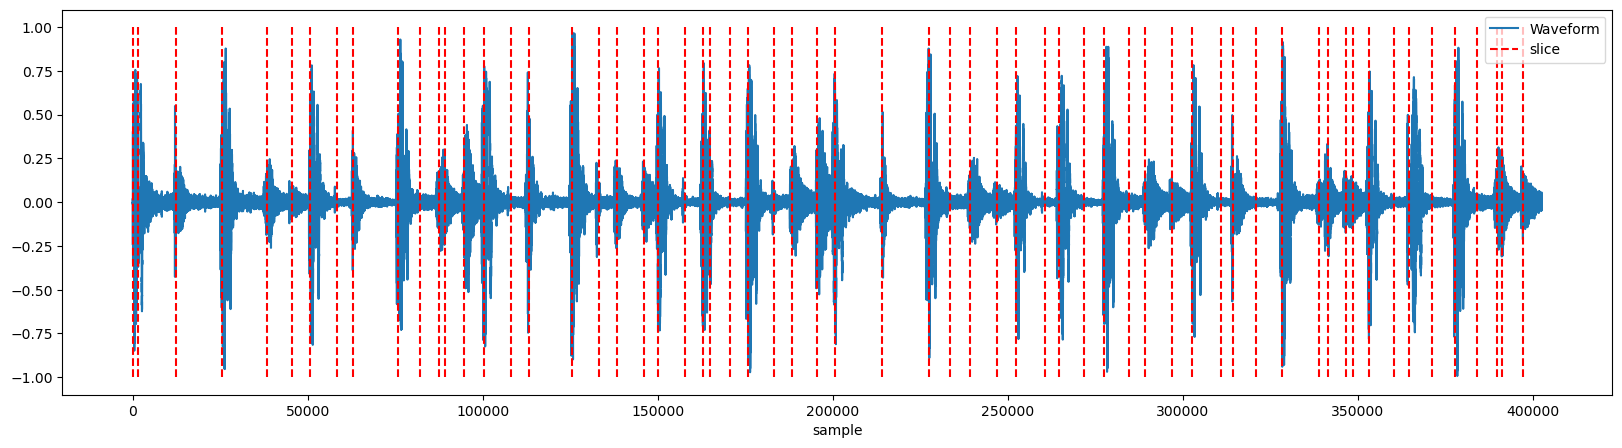

In [12]:
#optional - displaying and listening to slices (if you have may this may eat up lot of memory, especially the ipd.Audio widgets)

#plotting waveform with slicing points
plt.figure(figsize=(20, 5))
plt.plot(signal_full,label='Waveform',zorder=0)
plt.vlines(slice_points, -1, 1, alpha=1, color='r',
           linestyle='--', label='slice', zorder=1)
plt.legend(frameon=True, framealpha=0.75)
plt.xlabel('sample')
plt.show()


#creating an audio widget for each segment (remove or lower the range number if it eats too much RAM)
for i in range(signal_slices.shape[0]):
    ipd.display(ipd.Audio(signal_slices[i,:], rate=sr))
    

For more details on other librosa functions/utilities to slice files, you can check the following links:
* [librosa onset](https://librosa.org/doc/main/onset.html)
* [librosa beat](https://librosa.org/doc/main/beat.html)
* [librosa index slice](https://librosa.org/doc/main/generated/librosa.util.index_to_slice.html#librosa.util.index_to_slice)
* [librosa utilities](https://librosa.org/doc/main/util.html)


    
        
            

## 3. That's All Folks!

In [ ]:
import librosa
import scipy
import numpy as np
import IPython.display as ipd
from IPython.display import Audio
import matplotlib.pyplot as plt


def mySpectrogram(sig,w_size=1024,w_overlap=512,w_type='hann',sr=48000):

    f, t, Zxx = scipy.signal.stft(sig, fs=sr, window=w_type, nperseg=w_size, noverlap=w_overlap, return_onesided=True)

    # linear magnitude
    plt.figure(figsize=(8, 2))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.01, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
    return


sr=16000
x1, sr = librosa.load('./files/Last1.wav', sr=sr)
x2, sr = librosa.load('./files/Last2.wav', sr=sr)
x3, sr = librosa.load('./files/Last3.wav', sr=sr)
mySpectrogram(x1, w_size=256, w_overlap=128, sr=sr)
mySpectrogram(x2, w_size=256, w_overlap=128, sr=sr)
mySpectrogram(x3, w_size=256, w_overlap=128, sr=sr)
ipd.display(ipd.Audio(x1 ,rate=sr))
ipd.display(ipd.Audio(x2, rate=sr))
ipd.display(ipd.Audio(x3, rate=sr))

![all](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Thats_all_folks.svg/1589px-Thats_all_folks.svg.png?20150104034840)